In [2]:
import pandas as pd
from pandas.plotting import scatter_matrix

# Convention for import of the pyplot interface
import matplotlib.pyplot as plt

# Set-up to have matplotlib use its support for notebook inline plots
%matplotlib inline

In [3]:
df = pd.read_csv("eartquakes_Romania.csv")
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2017-03-08T13:43:13.070Z,45.6583,26.4629,148.97,4.1,mb,NaN,41.0,0.259,0.76,...,2017-04-20T10:53:57.224Z,"19km N of Gura Teghii, Romania",earthquake,3.2,3.9,0.127,17.0,reviewed,us,us
1,2017-02-08T15:08:20.550Z,45.5187,26.2594,127.01,4.7,mb,NaN,19.0,0.222,1.10,...,2017-03-01T06:16:37.044Z,"11km NNW of Nehoiu, Romania",earthquake,6.6,5.4,0.045,152.0,reviewed,us,us
2,2017-02-08T09:52:06.090Z,45.7360,26.6616,129.27,4.4,mb,NaN,48.0,0.559,1.23,...,2017-03-05T08:24:32.472Z,"4km WNW of Nereju, Romania",earthquake,6.4,5.4,0.148,13.0,reviewed,us,us
3,2016-12-27T23:20:56.100Z,45.7144,26.5283,97.00,5.6,mww,NaN,14.0,0.466,0.80,...,2017-03-23T22:52:05.040Z,"14km W of Nereju, Romania",earthquake,4.3,1.8,NaN,NaN,reviewed,us,us
4,2016-10-31T11:59:49.800Z,45.8700,26.7800,90.00,4.1,mb,NaN,NaN,NaN,1.43,...,2017-01-24T02:02:12.040Z,"2km SW of Matacina, Romania",earthquake,6.7,6.4,0.157,11.0,reviewed,buc,us


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             665 non-null    object 
 1   latitude         665 non-null    float64
 2   longitude        665 non-null    float64
 3   depth            665 non-null    float64
 4   mag              665 non-null    float64
 5   magType          665 non-null    object 
 6   nst              395 non-null    float64
 7   gap              415 non-null    float64
 8   dmin             45 non-null     float64
 9   rms              334 non-null    float64
 10  net              665 non-null    object 
 11  id               665 non-null    object 
 12  updated          665 non-null    object 
 13  place            665 non-null    object 
 14  type             665 non-null    object 
 15  horizontalError  35 non-null     float64
 16  depthError       218 non-null    float64
 17  magError        

In [5]:
df.dtypes

time                object
latitude           float64
longitude          float64
depth              float64
mag                float64
magType             object
nst                float64
gap                float64
dmin               float64
rms                float64
net                 object
id                  object
updated             object
place               object
type                object
horizontalError    float64
depthError         float64
magError           float64
magNst             float64
status              object
locationSource      object
magSource           object
dtype: object

In [6]:
# Since we loaded the model with object as dtype (for faster loading), 
# we're going to specify all the types manually
df['dateTime'] = pd.to_datetime(df['time'])

In [7]:
# split datetime into year, month, day, hour, minute, second and millisecond. Nanosecond was not recorder.
df['year'] = df['dateTime'].dt.year
df['month'] = df['dateTime'].dt.month
df['day'] = df['dateTime'].dt.day
df['hour'] = df['dateTime'].dt.hour
df['minute'] = df['dateTime'].dt.minute
df['second'] = df['dateTime'].dt.second
df['microsecond'] = df['dateTime'].dt.microsecond

In [8]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,locationSource,magSource,dateTime,year,month,day,hour,minute,second,microsecond
0,2017-03-08T13:43:13.070Z,45.6583,26.4629,148.97,4.1,mb,NaN,41.0,0.259,0.76,...,us,us,2017-03-08 13:43:13.070000+00:00,2017,3,8,13,43,13,70000
1,2017-02-08T15:08:20.550Z,45.5187,26.2594,127.01,4.7,mb,NaN,19.0,0.222,1.10,...,us,us,2017-02-08 15:08:20.550000+00:00,2017,2,8,15,8,20,550000
2,2017-02-08T09:52:06.090Z,45.7360,26.6616,129.27,4.4,mb,NaN,48.0,0.559,1.23,...,us,us,2017-02-08 09:52:06.090000+00:00,2017,2,8,9,52,6,90000
3,2016-12-27T23:20:56.100Z,45.7144,26.5283,97.00,5.6,mww,NaN,14.0,0.466,0.80,...,us,us,2016-12-27 23:20:56.100000+00:00,2016,12,27,23,20,56,100000
4,2016-10-31T11:59:49.800Z,45.8700,26.7800,90.00,4.1,mb,NaN,NaN,NaN,1.43,...,buc,us,2016-10-31 11:59:49.800000+00:00,2016,10,31,11,59,49,800000


In [9]:
# Remove duplicate rows
duplicate_rows_df = df[df.duplicated()]
df = df.drop_duplicates()

In [10]:
# # Plotting 
# scatter_matrix(df, alpha=0.4, figsize=(15,12), diagonal='kde');

# Spotting trends

In [11]:
# We want to see if we can spot a trend 
# for the depth and magnitude 
# between 1970 - 2017

In [12]:
# for the plot we calculate 
# the mean for each year

grouped_df = df.groupby("year")
mean_df = grouped_df.mean()
mean_df = mean_df.reset_index()
mean_df.head()

,year,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst,month,day,hour,minute,second,microsecond
0,1990,45.628318,26.232773,89.309091,3.936364,NaN,NaN,NaN,1.077273,NaN,8.487500,NaN,7.052632,6.772727,17.727273,8.500000,32.500000,25.227273,454090.909091
1,1991,45.385506,22.937185,43.664198,3.745679,NaN,NaN,NaN,1.106173,NaN,7.834375,NaN,7.575758,8.283951,15.111111,10.987654,27.790123,29.172840,510246.913580
2,1992,45.636526,25.895211,103.152632,4.200000,NaN,NaN,NaN,1.126316,NaN,5.993333,NaN,27.062500,7.631579,13.631579,13.157895,24.000000,32.947368,550526.315789
3,1993,45.450353,26.079471,98.329412,3.811765,NaN,NaN,NaN,1.017647,NaN,6.385714,NaN,16.533333,6.352941,16.588235,11.000000,22.529412,29.352941,588235.294118
4,1994,45.551444,25.028111,94.311111,3.761111,NaN,NaN,NaN,1.055556,NaN,7.738462,NaN,7.200000,7.611111,14.222222,13.111111,30.388889,27.666667,475000.000000


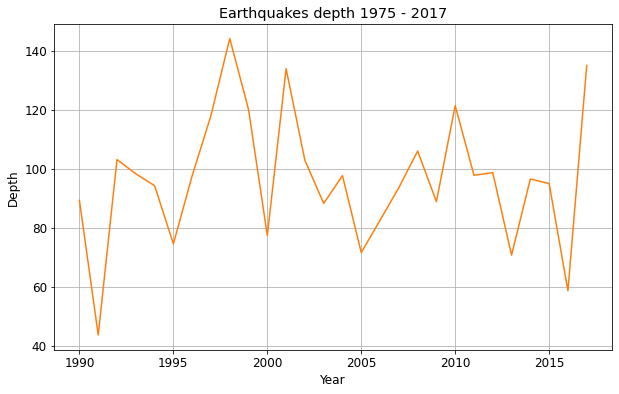

In [13]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(mean_df.year, mean_df.depth, color='tab:orange', label='depth')

# Same as above
ax.set_xlabel('Year')
ax.set_ylabel('Depth')
ax.set_title('Earthquakes depth 1975 - 2017')
ax.grid(True)

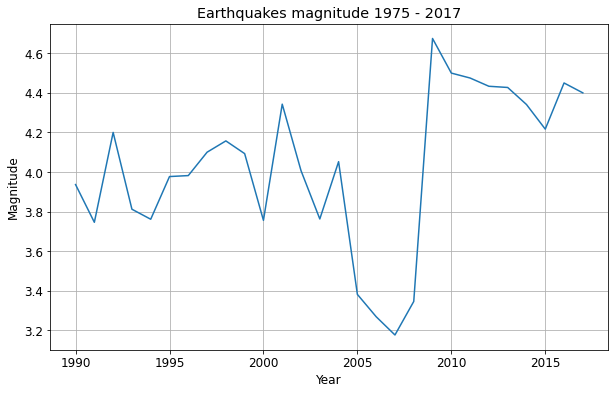

In [14]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(mean_df.year, mean_df.mag, color='tab:blue', label='magnitude')

# Same as above
ax.set_xlabel('Year')
ax.set_ylabel('Magnitude')
ax.set_title('Earthquakes magnitude 1975 - 2017')
ax.grid(True)

# Finding correlations

Depth and magnitude correlation:  0.16901812241572492


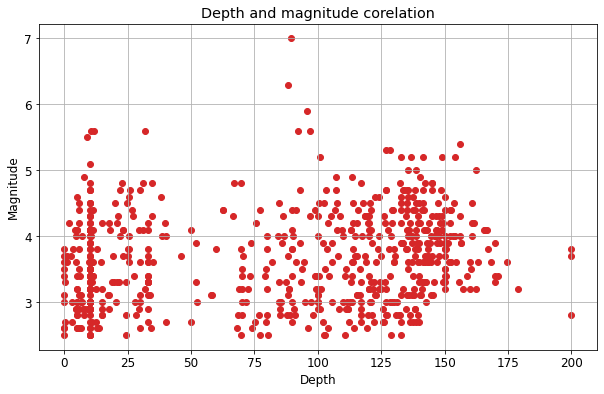

In [15]:
# We want to see if we can spot a corelation 
# between depth and magnitude

fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.scatter(df.depth, df.mag, color='tab:red')

# Same as above
ax.set_xlabel('Depth')
ax.set_ylabel('Magnitude')
ax.set_title('Depth and magnitude corelation')
ax.grid(True)

correlation = df["depth"].corr(df["mag"])
print("Depth and magnitude correlation: ", correlation)